In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



In [2]:
import sklearn
sklearn.__version__

'0.21.1'

In [3]:
result_dict = {}

In [4]:
def summarise_classification(Y_test,Y_pred):
    
    acc = accuracy_score(Y_test,Y_pred,normalize=True)
    prec = precision_score(Y_test,Y_pred)
    rec = recall_score(Y_test,Y_pred)
    roc = roc_auc_score(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    acc_count = accuracy_score(Y_test,Y_pred,normalize=False)
    model_crosstab = pd.crosstab(Y_test,Y_pred)
    
    return {'accuracy':acc,'precision':prec,'recall':rec ,'AUC':roc,'accuracy_count':acc_count,'r2Score':r2,'mean_squared_error':mse,'confusionmatrix':model_crosstab}


In [5]:
def buildModel(class_fn,X,Y,test_frac=0.2):
        
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=test_frac)
    model = class_fn(X_train,Y_train)
    
    Y_pred = model.predict(X_test)
    
    Y_pred_train = model.predict(X_train)
    train_summary = summarise_classification(Y_train,Y_pred_train)
    test_summary = summarise_classification( Y_test,Y_pred)
    
    pred_result = pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred})   
    
    
    return model,{'training':train_summary,'test':test_summary}

In [6]:

#label_encoding.classes_

In [7]:
def compare_results():
    for key in result_dict:
        print ('Classification: ',key)
        print()
        print('Training data')
        for scorekey in result_dict[key]['training']:
            print(scorekey,': ',result_dict[key]['training'][scorekey])
            
        print()
        print('Test data')
        for scorekey in result_dict[key]['test']:
            print(scorekey, ': ' ,result_dict[key]['test'][scorekey])
        
        print()

In [8]:
def classifier_fn(x_train,y_train):
    model = KNeighborsClassifier()   #default neighbours =5 
    start_time = time.time()
    model.fit(x_train,y_train)
    print("training time base model: ",(time.time() - start_time) ," seconds")
    
    return model


In [9]:
dfAdult = pd.read_csv(".\\data\\adult.csv")

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 

dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
print(X.columns)
print(X.shape)

print(Y.shape)


#X=X_HotEncoded
#Y=Y_HotEncoded
#X = X[:, None]


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
(32561,)


In [10]:
"""
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#sphx-glr-auto-examples-model-selection-plot-learning-curve-py 
"""
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #fit_times_mean = np.mean(fit_times, axis=1)
    #fit_times_std = np.std(fit_times, axis=1)
  
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    """
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    """
    return plt


training time base model:  0.4545862674713135  seconds
Classification:  KNN_Adult

Training data
accuracy :  0.8339987714987716
precision :  0.7628032345013477
recall :  0.45106789926681545
AUC :  0.7032825083468698
accuracy_count :  21724
r2Score :  0.09213552093066713
mean_squared_error :  0.1660012285012285
confusionmatrix :  col_0       0     1
salary             
0       18894   880
1        3444  2830

Test data
accuracy :  0.7770612620912022
precision :  0.5613660618996799
recall :  0.3356732610082961
AUC :  0.626287904260719
accuracy_count :  5061
r2Score :  -0.2201819213556182
mean_squared_error :  0.22293873790879778
confusionmatrix :  col_0      0    1
salary           
0       4535  411
1       1041  526



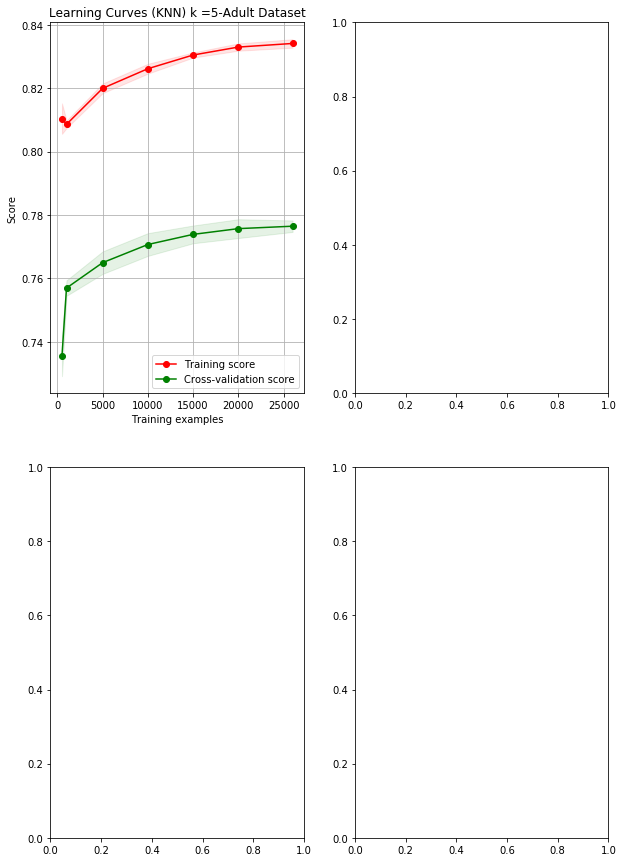

In [11]:
model,result_dict['KNN_Adult'] = buildModel(classifier_fn,X,Y)
compare_results()

train_sizes = [500,1000,5000, 10000, 15000, 20000, 26000]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (KNN) k =5-Adult Dataset"

plot_learning_curve(model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

def grid_searchCV(X,Y,params,cv):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)
    parameters = params
    grid_search=(GridSearchCV(KNeighborsClassifier(),parameters,cv=cv,return_train_score=True))

    start_time = time.time()
    grid_search.fit(X_train,Y_train)
    print("training time hyperparameter: ",(time.time() - start_time) ," seconds")
    
    count = 1
    for x in parameters: 
        if isinstance(parameters[x], list): 
            count *= len(parameters[x]) 

    for i in range(count):
        print('parameters: ',grid_search.cv_results_['params'][i])
        print('mean_test_score: ',grid_search.cv_results_['mean_test_score'][i])
        print('rank: ',grid_search.cv_results_['rank_test_score'][i])    

    Y_pred = grid_search.predict(X_test)
    print(summarise_classification(Y_test,Y_pred))
    return grid_search

training time hyperparameter:  131.71957111358643  seconds
parameters:  {'n_neighbors': 2}
mean_test_score:  0.7820562039312039
rank:  5
parameters:  {'n_neighbors': 4}
mean_test_score:  0.7864327395577395
rank:  4
parameters:  {'n_neighbors': 5}
mean_test_score:  0.7742628992628993
rank:  6
parameters:  {'n_neighbors': 6}
mean_test_score:  0.7896575552825553
rank:  3
parameters:  {'n_neighbors': 8}
mean_test_score:  0.7921145577395577
rank:  2
parameters:  {'n_neighbors': 10}
mean_test_score:  0.7946099508599509
rank:  1
{'accuracy': 0.7953324120988792, 'precision': 0.726890756302521, 'recall': 0.22336991607488701, 'AUC': 0.5985906792300301, 'accuracy_count': 5180, 'r2Score': -0.12908863767479617, 'mean_squared_error': 0.20466758790112083, 'confusionmatrix': col_0      0    1
salary           
0       4834  130
1       1203  346}
training time best model:  0.5677464008331299  seconds
{'accuracy': 0.7847382158759404, 'precision': 0.7136752136752137, 'recall': 0.20848938826466917, 'AUC'

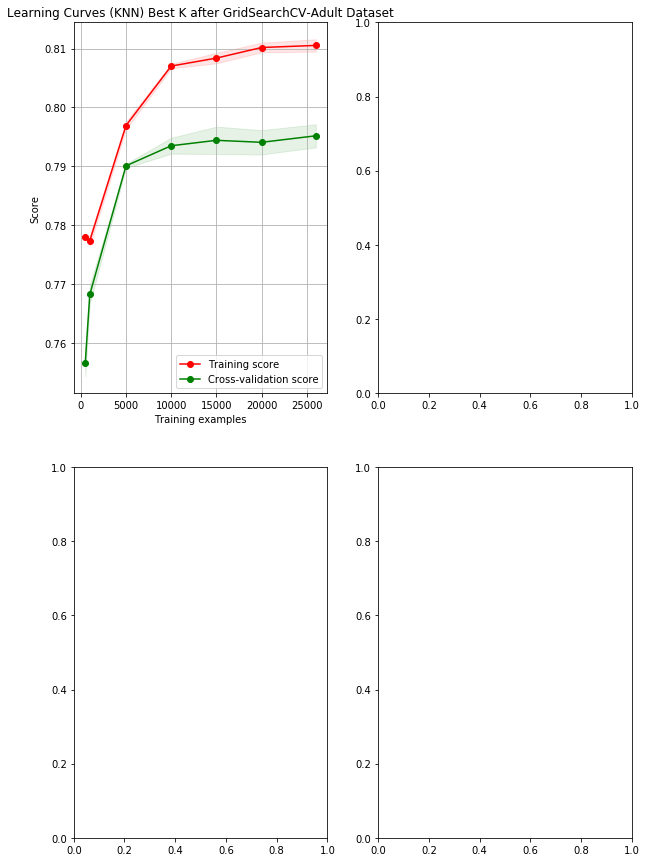

In [14]:
parameters ={'n_neighbors':[2,4,5,6,8,10]}
grid_search = grid_searchCV(X,Y,parameters,6)

dt_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)
start_time = time.time()
dt_model.fit(X_train,Y_train)
print("training time best model: ",(time.time() - start_time) ," seconds")

Y_pred = dt_model.predict(X_test)
print(summarise_classification(Y_test,Y_pred))

train_sizes = [500, 1000,5000, 10000, 15000, 20000, 26000]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (KNN) Best K after GridSearchCV-Adult Dataset"

plot_learning_curve(dt_model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()

(2000, 500)
(2000,)
training time base model:  0.09447979927062988  seconds
Classification:  KNN_Adult

Training data
accuracy :  0.8339987714987716
precision :  0.7628032345013477
recall :  0.45106789926681545
AUC :  0.7032825083468698
accuracy_count :  21724
r2Score :  0.09213552093066713
mean_squared_error :  0.1660012285012285
confusionmatrix :  col_0       0     1
salary             
0       18894   880
1        3444  2830

Test data
accuracy :  0.7770612620912022
precision :  0.5613660618996799
recall :  0.3356732610082961
AUC :  0.626287904260719
accuracy_count :  5061
r2Score :  -0.2201819213556182
mean_squared_error :  0.22293873790879778
confusionmatrix :  col_0      0    1
salary           
0       4535  411
1       1041  526

Classification:  KNN_Madelon

Training data
accuracy :  0.82125
precision :  0.8337628865979382
recall :  0.804726368159204
AUC :  0.8213330333258332
accuracy_count :  1314
r2Score :  0.28498212455311367
mean_squared_error :  0.715
confusionmatrix :  c

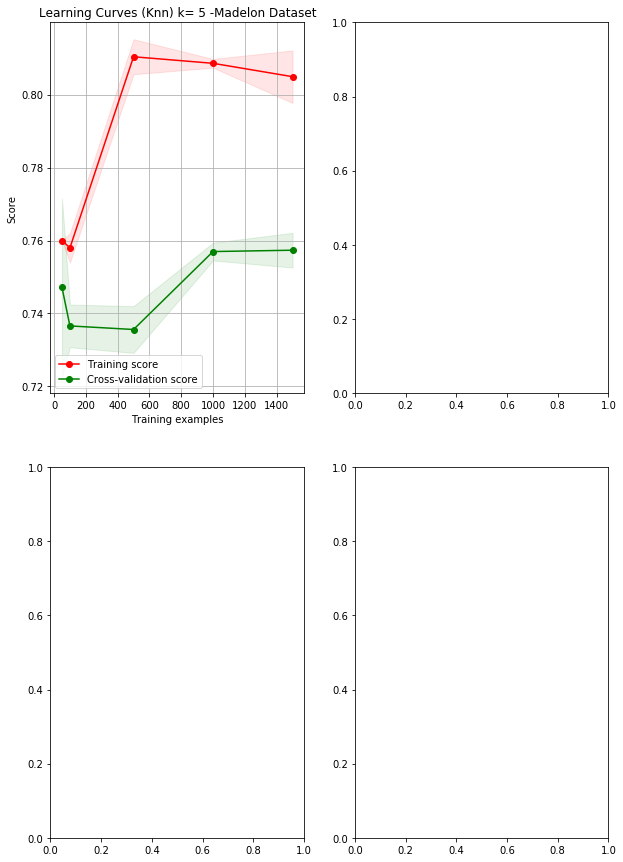

In [15]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)

model,result_dict['KNN_Madelon'] = buildModel(classifier_fn,dfMadelon_X,dfMadelon_Y)
compare_results()

train_sizes = [50, 100,500, 1000, 1500]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Knn) k= 5 -Madelon Dataset"

plot_learning_curve(model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()


training time hyperparameter:  177.4367859363556  seconds
parameters:  {'n_neighbors': 2}
mean_test_score:  0.6525
rank:  6
parameters:  {'n_neighbors': 4}
mean_test_score:  0.6925
rank:  5
parameters:  {'n_neighbors': 5}
mean_test_score:  0.700625
rank:  4
parameters:  {'n_neighbors': 6}
mean_test_score:  0.70375
rank:  3
parameters:  {'n_neighbors': 8}
mean_test_score:  0.705625
rank:  2
parameters:  {'n_neighbors': 10}
mean_test_score:  0.713125
rank:  1
{'accuracy': 0.725, 'precision': 0.8027210884353742, 'recall': 0.592964824120603, 'AUC': 0.7243431085777146, 'accuracy_count': 290, 'r2Score': -0.10002750068751753, 'mean_squared_error': 1.1, 'confusionmatrix': col_0     -1    1
Predict          
-1       172   29
 1        81  118}
training time best model:  0.06969356536865234  seconds
{'accuracy': 0.6875, 'precision': 0.7480916030534351, 'recall': 0.5157894736842106, 'AUC': 0.6793233082706767, 'accuracy_count': 275, 'r2Score': -0.25313283208020065, 'mean_squared_error': 1.25, 'co

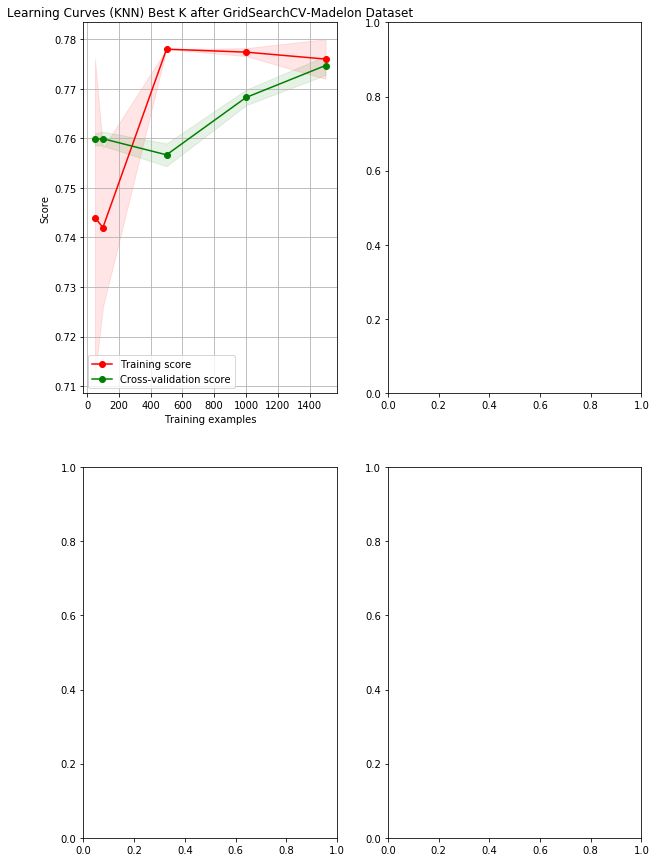

In [16]:
parameters ={'n_neighbors':[2,4,5,6,8,10]}
grid_search = grid_searchCV(dfMadelon_X, dfMadelon_Y,parameters,6)

dt_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
X_train,X_test,Y_train,Y_test = train_test_split(dfMadelon_X, dfMadelon_Y, test_size=0.2)

start_time = time.time()
dt_model.fit(X_train,Y_train)
print("training time best model: ",(time.time() - start_time) ," seconds")
Y_pred = dt_model.predict(X_test)
print(summarise_classification(Y_test,Y_pred))
train_sizes = [50, 100,500, 1000, 1500]
fig, axes = plt.subplots(2, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (KNN) Best K after GridSearchCV-Madelon Dataset"

plot_learning_curve(dt_model, title, X, Y, axes=axes[:, 0],
                    cv=5, n_jobs=4,train_sizes=train_sizes)

plt.show()
#print(dt_model.feature_importances_)